In [ ]:
import tensorflow as tf

In [ ]:
import os

In [ ]:
#avoid oom errors by setting GPU memory consumption growth
gpus=tf.config.experimental.list_logical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

Removal of dodgy images

In [ ]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [ ]:
data_dir='sample_data'
image_exts=['jpg','jpeg','png']

In [ ]:
os.listdir(data_dir)

['Ice', '.ipynb_checkpoints', 'NoIce']

[[104 103 122 ...  23  24  24]
 [113 109 120 ...  25  24  24]
 [ 92  92 103 ...  28  24  24]
 ...
 [185 188 181 ... 163 165 165]
 [184 187 180 ... 177 186 186]
 [181 185 179 ... 176 187 187]]
(355, 474)


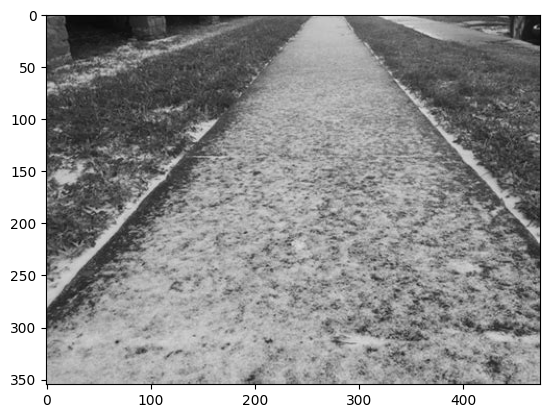

In [ ]:
img=cv2.imread('/content/sample_data/Ice/image.jpg',0)
print(img)
print(img.shape)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

What we did is that we remove all the images which are of less size as they may be blur, not of good quality and many more.

In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
      image_path=os.path.join(data_dir,image_class, image)
      try:
        img=cv2.imread(image_path)
        tip=imghdr.what(image_path)
        if tip not in image_exts:
          print("Image not in exts list{}".format(image_path))
          os.remove(image_path)
      except:
        print("Issue with images {}".format(image_path))

Loading of Data

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data=tf.keras.utils.image_dataset_from_directory('sample_data')  # building the data pipeline
data

Found 374 files belonging to 2 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
data = data.shuffle(buffer_size=100)
data_iterator=data.as_numpy_iterator() #accessing the pipeline by loop

In [ ]:
batch=data_iterator.next() #grabs one batch size

In [ ]:
batch[0].shape  #Image represented as numpy array

(32, 256, 256, 3)

In [ ]:
batch[1]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int32)

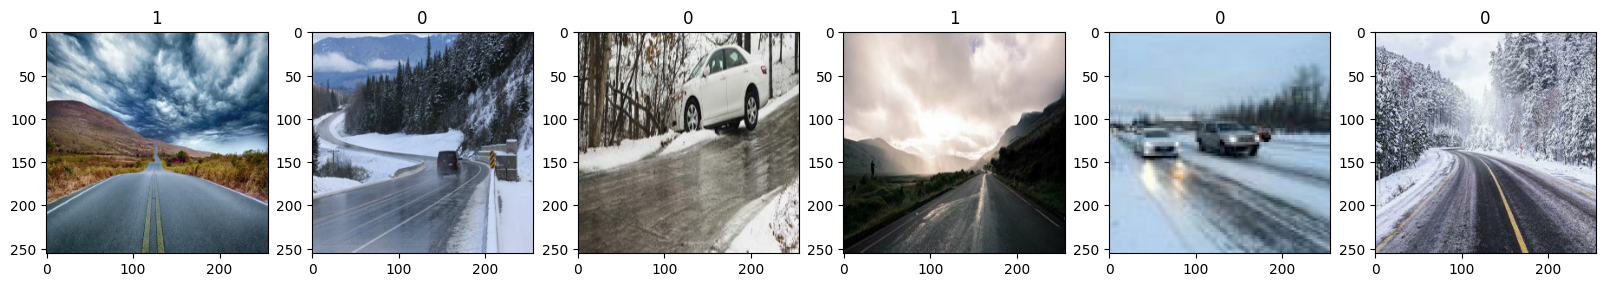

In [ ]:
fig, ax=plt.subplots(ncols=6, figsize=(20,20))
for idx, img in enumerate(batch[0][:6]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

**PREPROCESS DATA**

In [ ]:
data = data.map(lambda x,y:(x/255 ,y))

In [ ]:
scalar_iterator=data.as_numpy_iterator()  #next defines the suffling of the data if we don't use next() then the same will be printed
batch=scalar_iterator.next()
batch

(array([[[[0.99973613, 0.87748045, 0.7361083 ],
          [0.996606  , 0.85513043, 0.70894474],
          [0.9966136 , 0.8788329 , 0.72975403],
          ...,
          [0.9907782 , 0.68097425, 0.3201307 ],
          [0.9907782 , 0.68097425, 0.32018995],
          [0.99954045, 0.6931985 , 0.32849264]],
 
         [[0.9985398 , 0.8685918 , 0.72495395],
          [0.99368453, 0.86630416, 0.7201185 ],
          [0.98544717, 0.85509163, 0.7055665 ],
          ...,
          [0.9776348 , 0.66525126, 0.30360597],
          [0.9776348 , 0.6650735 , 0.30428922],
          [0.9946998 , 0.6821385 , 0.31881127]],
 
         [[0.9843463 , 0.8489052 , 0.7028288 ],
          [0.98841316, 0.85018706, 0.7023409 ],
          [0.9832158 , 0.8548967 , 0.70337   ],
          ...,
          [0.9708436 , 0.6548151 , 0.28680563],
          [0.9715258 , 0.6542647 , 0.28722426],
          [0.98985904, 0.6735315 , 0.30878884]],
 
         ...,
 
         [[0.11895022, 0.13463649, 0.1464012 ],
          [0.10772

In [ ]:
batch[0].min()

0.0

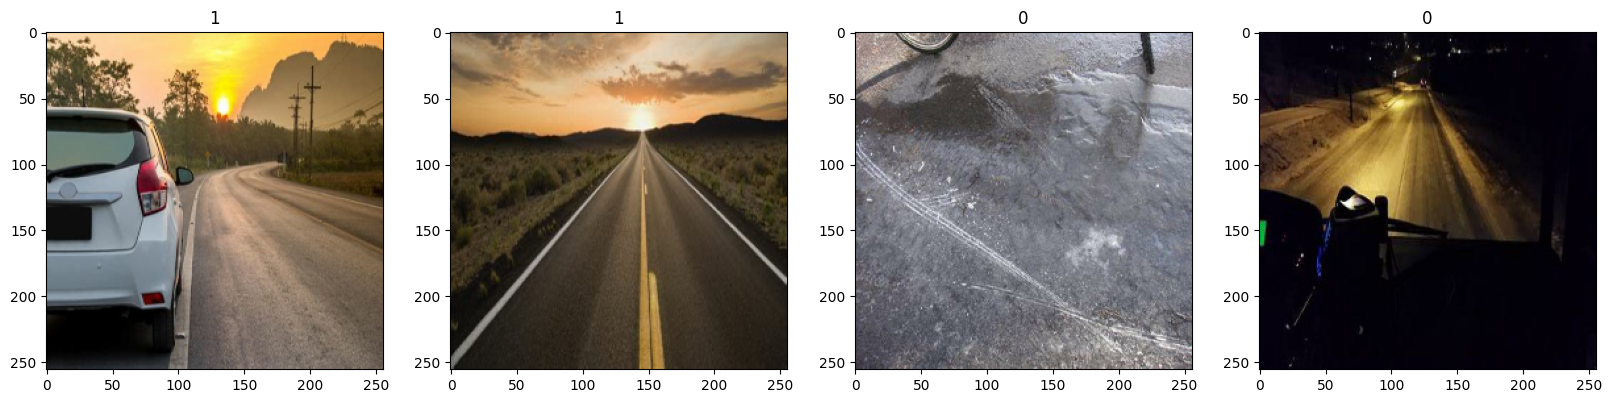

In [ ]:
fix, ax=plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

**Spliting of the data**

**Heat Map of the images**

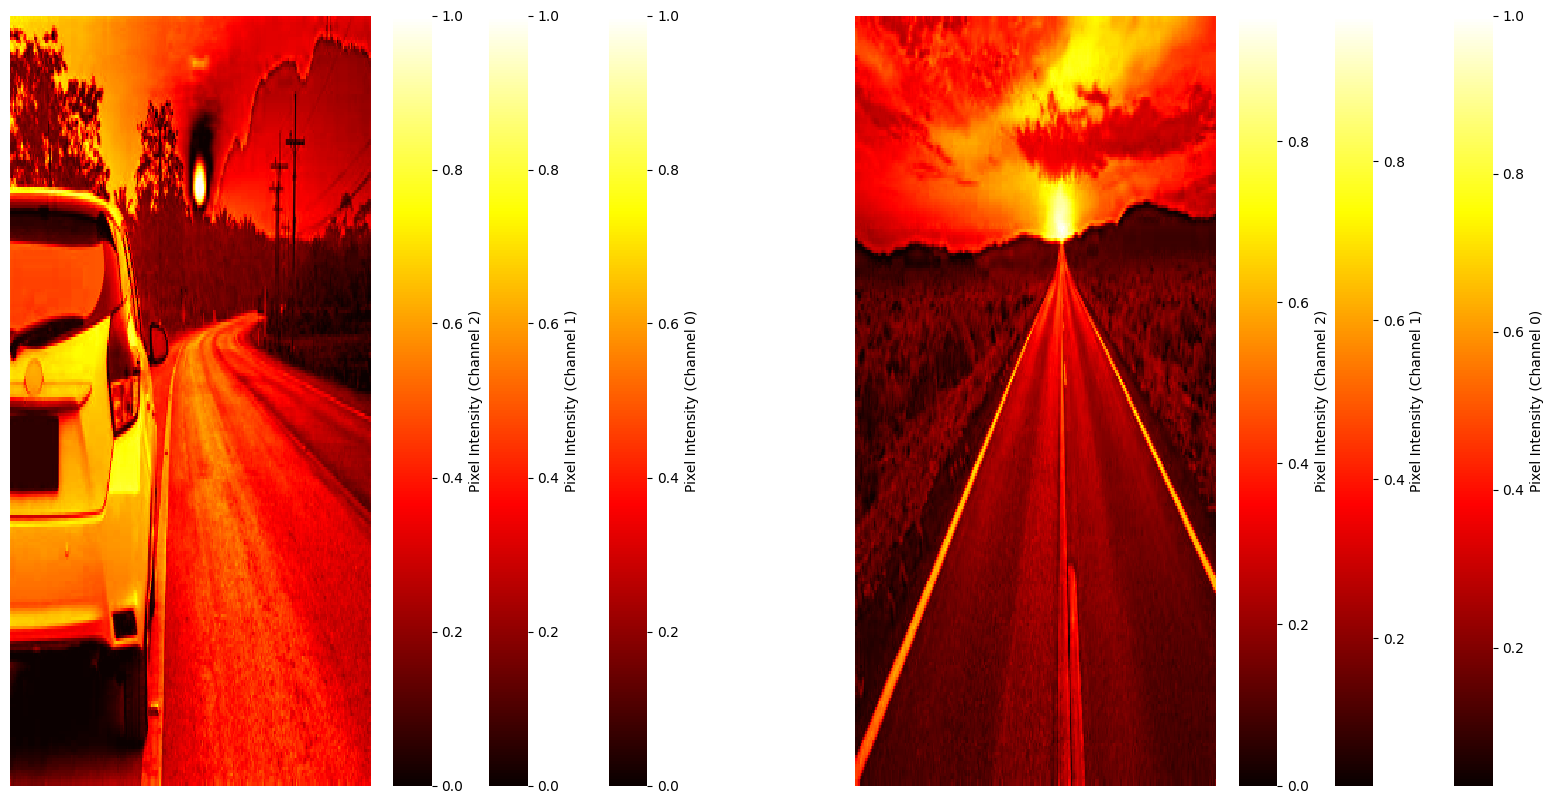

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming batch[0] contains your image data
images = batch[0][:2]

# Create a subplot with 1 row and 2 columns
fig, ax = plt.subplots(ncols=2, figsize=(20, 10))

# Iterate over each image
for idx, img in enumerate(images):
    # Flatten each channel individually
    flattened_img = img.reshape(-1, img.shape[-1])

    # Create a heatmap for each channel
    for channel in range(img.shape[-1]):
        channel_data = flattened_img[:, channel]
        channel_data_2d = channel_data.reshape(img.shape[:-1])
        sns.heatmap(channel_data_2d, cmap='hot', cbar_kws={'label': f'Pixel Intensity (Channel {channel})'}, ax=ax[idx])
        ax[idx].axis('off')

plt.show()


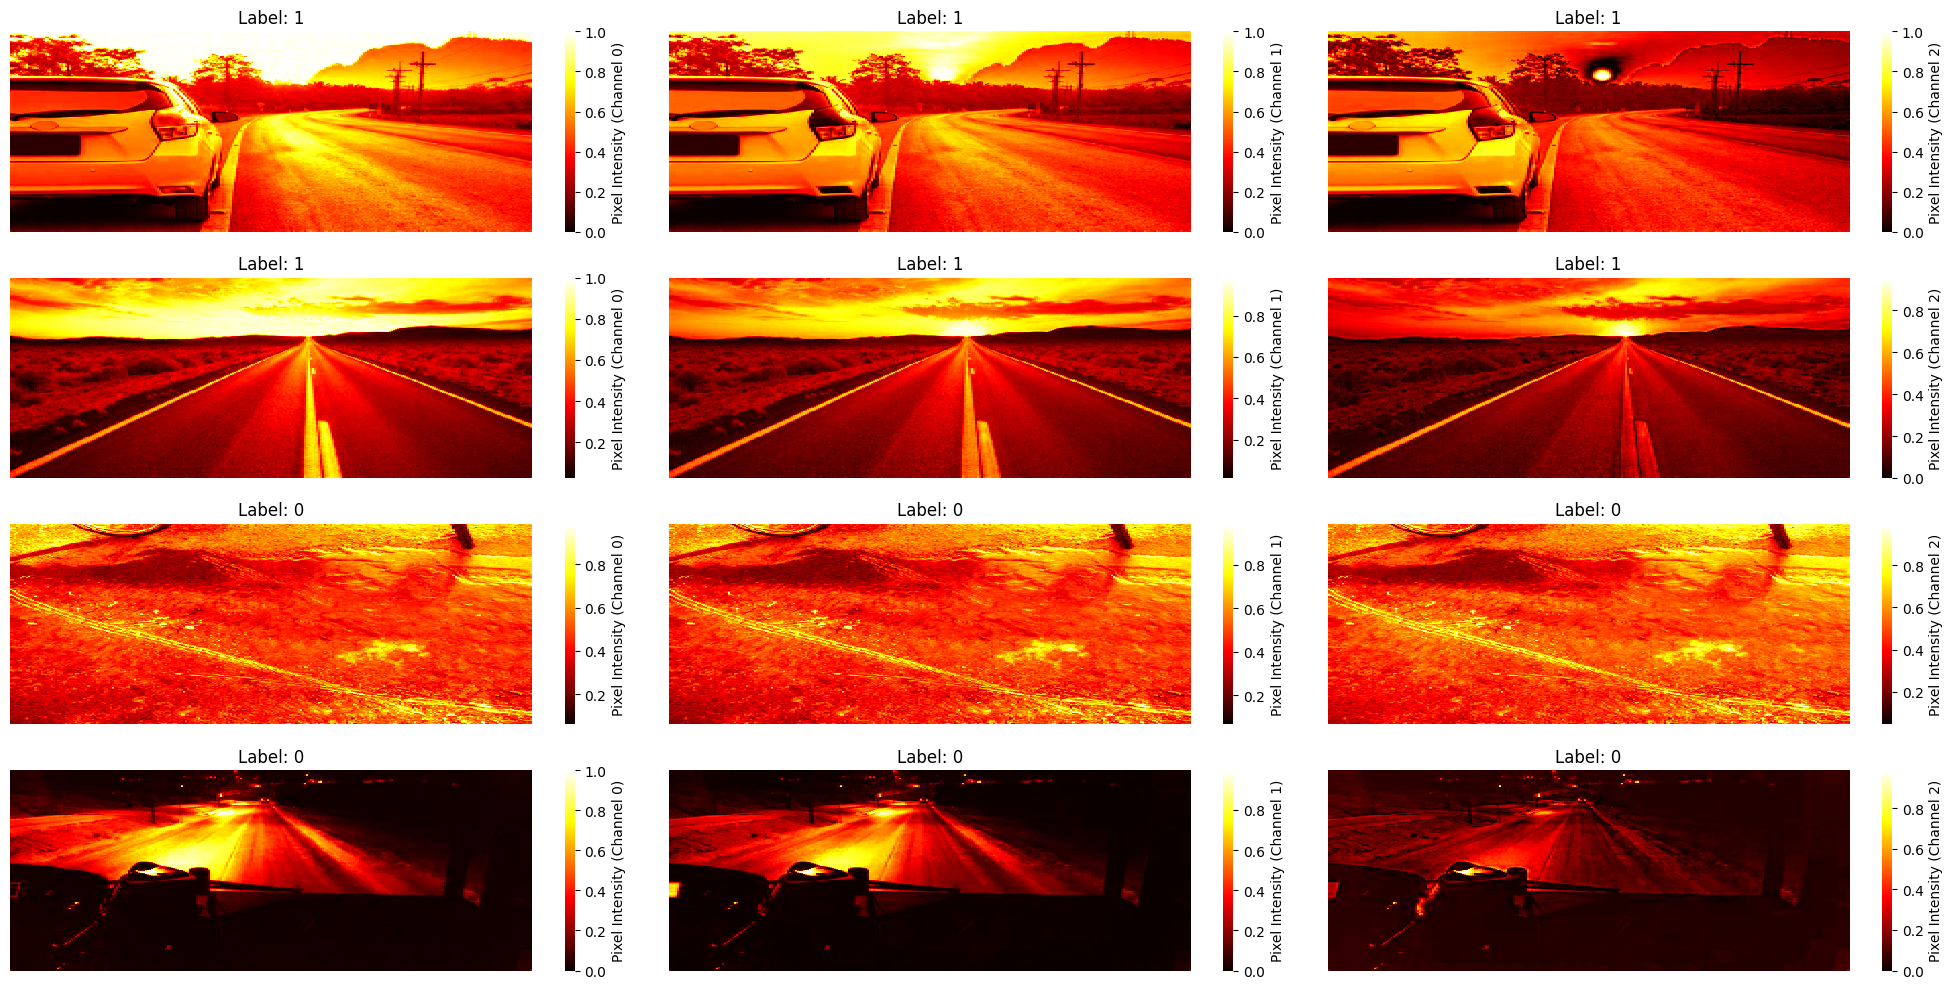

In [ ]:
import seaborn as sn
images=batch[0][:4]
fix, ax=plt.subplots(nrows=4, ncols=3, figsize=(20,10))
for idx, img in enumerate(images):

    flattened_img = img.reshape(-1, img.shape[-1])

    for channel in range(img.shape[-1]):
        channel_data = flattened_img[:, channel]
        channel_data_2d = channel_data.reshape(img.shape[:-1])
        sn.heatmap(channel_data_2d, cmap='hot', cbar_kws={'label': f'Pixel Intensity (Channel {channel})'}, ax=ax[idx, channel])
        ax[idx, channel].axis('off')
        ax[idx, channel].set_title(f"Label: {batch[1][idx]}")

plt.tight_layout()

plt.show()

In [ ]:
len(data)

12

In [ ]:
train_size=int(len(data)*0.7)
val_size=int(len(data)*0.2)
test_size=int(len(data)*0.1)

In [ ]:
train_size+val_size+test_size

11

In [ ]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

**Model Building**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
#conv2d-> 2D convolutional layer
#Maxpooling layer -> condense the images
#Dropout -> used for regularization

In [ ]:
  #adding a convolutional layer and a maxpool layer. 1st layer has 16 filter which condense
  #to good classification (3,3) describe the pixel of image and 1 describe the movement
  #i.e. move by 1 pixel each time
  #relu make all negative values to 0 and positive remains the same
  #sigmoid function gives 0 for negative and +1 for positive output

  model=Sequential()

  model.add(Conv2D(16,(3,3), 1, activation='relu', input_shape=(256,256,3)))
  model.add(MaxPooling2D())

  model.add(Conv2D(32, (3,3), 1, activation='relu'))
  model.add(MaxPooling2D())

  model.add(Conv2D(16, (3,3), 1, activation='relu'))
  model.add(MaxPooling2D())

  model.add(Flatten())


  model.add(Dense(256, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
#adam is an optimizer

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

**Training of the data**

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist=model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
8/8 [==============================] - 11s 1s/step - loss: 0.6374 - accuracy: 0.6094 - val_loss: 0.5360 - val_accuracy: 0.8125
Epoch 2/20
8/8 [==============================] - 11s 1s/step - loss: 0.3957 - accuracy: 0.8320 - val_loss: 0.5823 - val_accuracy: 0.7344
Epoch 3/20
8/8 [==============================] - 10s 1s/step - loss: 0.3141 - accuracy: 0.8780 - val_loss: 0.2527 - val_accuracy: 0.8906
Epoch 4/20
8/8 [==============================] - 9s 1s/step - loss: 0.2342 - accuracy: 0.9106 - val_loss: 0.2218 - val_accuracy: 0.9375
Epoch 5/20
8/8 [==============================] - 9s 1s/step - loss: 0.2051 - accuracy: 0.9309 - val_loss: 0.1579 - val_accuracy: 0.9531
Epoch 6/20
8/8 [==============================] - 10s 1s/step - loss: 0.2374 - accuracy: 0.9106 - val_loss: 0.2342 - val_accuracy: 0.8906
Epoch 7/20
8/8 [==============================] - 11s 1s/step - loss: 0.2092 - accuracy: 0.9141 - val_loss: 0.2711 - val_accuracy: 0.8750
Epoch 8/20
8/8 [====================

In [ ]:
hist.history

{'loss': [0.6374285221099854,
  0.3956764340400696,
  0.314054012298584,
  0.2341722995042801,
  0.2050858438014984,
  0.2374093234539032,
  0.20921212434768677,
  0.15099389851093292,
  0.14611724019050598,
  0.09815892577171326,
  0.060274045914411545,
  0.05427931249141693,
  0.051691338419914246,
  0.07252989709377289,
  0.03122595325112343,
  0.020455678924918175,
  0.07819803804159164,
  0.09650722146034241,
  0.1205148696899414,
  0.05612144246697426],
 'accuracy': [0.609375,
  0.83203125,
  0.8780487775802612,
  0.9105691313743591,
  0.9308943152427673,
  0.9105691313743591,
  0.9140625,
  0.9430894255638123,
  0.9674796462059021,
  0.98046875,
  0.9837398529052734,
  0.9837398529052734,
  0.9796748161315918,
  0.9837398529052734,
  0.9918699264526367,
  1.0,
  0.9674796462059021,
  0.9674796462059021,
  0.96484375,
  0.9878048896789551],
 'val_loss': [0.5359838604927063,
  0.5822514295578003,
  0.2526506185531616,
  0.22178779542446136,
  0.15788276493549347,
  0.2341585755348

**Performance Analysis**

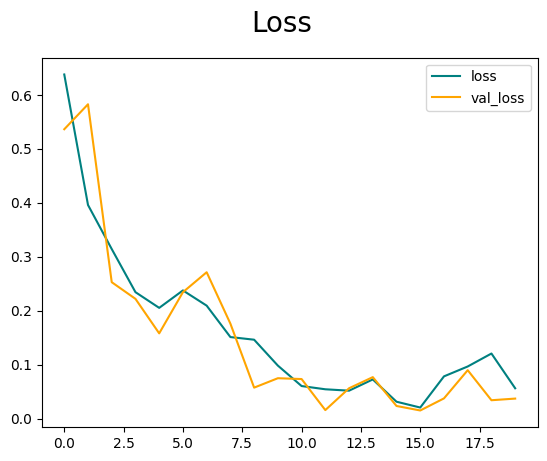

In [ ]:
fig=plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle("Loss",fontsize=20)
plt.legend(loc="upper right")
plt.show()

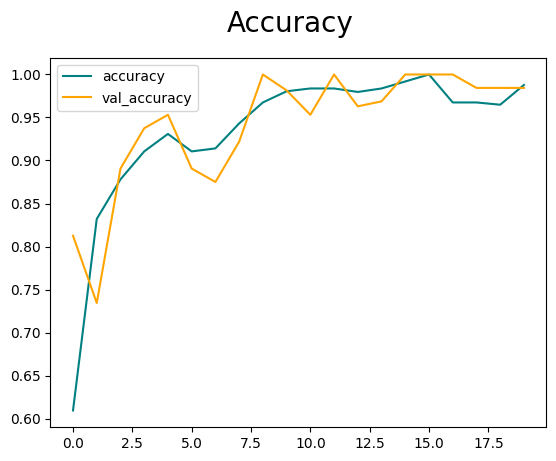

In [ ]:
fig=plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle("Accuracy",fontsize=20)
plt.legend(loc="upper left")
plt.show()

**Evalution of the Model**

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
precision=Precision()
recall=Recall()
binaryAccuracy=BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  X,y=batch
  yhat=model.predict(X)
  precision.update_state(y, yhat)
  recall.update_state(y, yhat)
  binaryAccuracy.update_state(y, yhat)

1/1 [==============================] - 0s 333ms/step


In [ ]:
print(f'Precision:{precision.result().numpy()}, Recall:{recall.result().numpy()}, BinaryAccuracy{binaryAccuracy.result().numpy()}')

Precision:1.0, Recall:0.9090909361839294, BinaryAccuracy0.96875


**Testing**

In [ ]:
import cv2

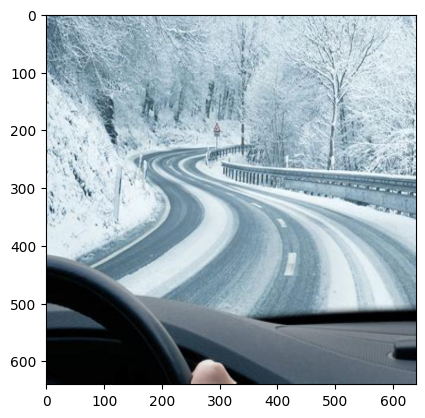

In [ ]:
img=cv2.imread('/content/th-26-_png.rf.98e124ffc0362f97c9595238c645c91e.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

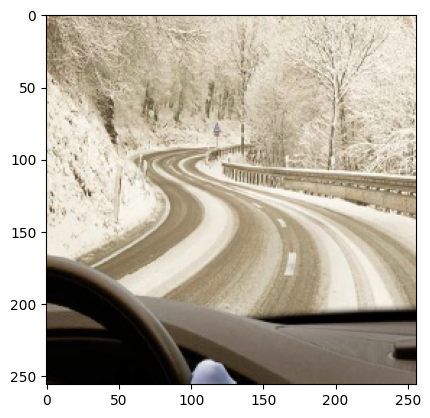

In [ ]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show

In [ ]:
yhat=model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 78ms/step


In [ ]:
yhat[0]

array([0.05302932], dtype=float32)

In [ ]:
if yhat>0.5:
  print("No ice detected")
else:
  print("Ice present on the road")

Ice present on the road
